<a href="https://colab.research.google.com/github/HamzahSarmad/Y3_CO3093_Big_Data_And_Predictive_Analytics/blob/main/Week2TUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1**

# Import Pandas library and load in the data file

In [1]:
import pandas as pd
df = pd.read_csv('/content/sample_data/police.csv')

# Printing first 10 rows of dataset

In [2]:
df.head(10)

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_id,type,violation
0,1,2011-01-01,01:00:00,TRO COUNTY,Natrona County,23.0,white,male,791f232f61,B,vehicular,SEAT BELT: DRIVER
1,2,2011-01-01,01:00:00,TRO COUNTY,Natrona County,24.0,white,male,791f232f61,B,vehicular,SEAT BELT: PASSENGER
2,3,2011-01-01,01:29:00,"2 WY 22|2 WY 22, TETON COUNTY",Teton County,45.0,white,male,f369634e28,K,vehicular,DUI: ALCOHOL 0.08% OR MORE|DRIVE VEH W/I SINGL...
3,4,2011-01-01,03:00:00,"111 I 80 E, SWEETWATER COUNTY",Sweetwater County,49.0,white,male,decf9509bb,E,vehicular,"FAIL TO REPORT OVER $1,000 PROP DAMAGE OR INJURY"
4,5,2011-01-01,04:15:00,"10 26|10 26|10 26, PLATTE COUNTY",Platte County,36.0,hispanic,male,3f486394a7,F,vehicular,PEDESTRIAN UND INFLU OF ALCOHOL OR CONTR SUBST...
5,6,2011-01-01,05:55:00,"3 22, TETON COUNTY",Teton County,33.0,white,male,eaeaf19018,K,vehicular,"DRIVE WHILE LIC CANCELLED, SUSPENDED, OR REVOKED"
6,7,2011-01-01,06:20:00,SUBLETTE COUNTY,Sublette County,54.0,white,male,58747fe63d,T,vehicular,EXCEED POSTED SPEED IN SUPERINTENDENT ZONE
7,8,2011-01-01,07:30:00,"8 I 25 N, LARAMIE COUNTY",Laramie County,48.0,white,male,a4ceae6655,A,vehicular,EXCEED POSTED SPEED IN SUPERINTENDENT ZONE
8,9,2011-01-01,08:00:00,"95 191, SUBLETTE COUNTY",Sublette County,38.0,white,male,eb37cf8bfd,T,vehicular,COMPULSORY AUTO INSURANCE
9,10,2011-01-01,08:15:00,"31 114, PARK COUNTY",Park County,28.0,white,male,4a74d2fd1f,N,vehicular,EXCEED 65 MPH ON PRMRY/SCNDRY HWY (SPEED)


# Summary of missing values

In [3]:
df.shape

(155090, 12)

In [4]:
df.isnull().sum()

raw_row_number        0
date                356
time                 19
location            997
county_name        2023
subject_age         630
subject_race        465
subject_sex        1167
officer_id_hash       1
department_id      7922
type                  1
violation             2
dtype: int64

# Drop county name column

In [5]:
df.drop('county_name', axis='columns', inplace=True)
df.shape

(155090, 11)

In [6]:
df.head(5)

,raw_row_number,date,time,location,subject_age,subject_race,subject_sex,officer_id_hash,department_id,type,violation
0,1,2011-01-01,01:00:00,TRO COUNTY,23.0,white,male,791f232f61,B,vehicular,SEAT BELT: DRIVER
1,2,2011-01-01,01:00:00,TRO COUNTY,24.0,white,male,791f232f61,B,vehicular,SEAT BELT: PASSENGER
2,3,2011-01-01,01:29:00,"2 WY 22|2 WY 22, TETON COUNTY",45.0,white,male,f369634e28,K,vehicular,DUI: ALCOHOL 0.08% OR MORE|DRIVE VEH W/I SINGL...
3,4,2011-01-01,03:00:00,"111 I 80 E, SWEETWATER COUNTY",49.0,white,male,decf9509bb,E,vehicular,"FAIL TO REPORT OVER $1,000 PROP DAMAGE OR INJURY"
4,5,2011-01-01,04:15:00,"10 26|10 26|10 26, PLATTE COUNTY",36.0,hispanic,male,3f486394a7,F,vehicular,PEDESTRIAN UND INFLU OF ALCOHOL OR CONTR SUBST...


# Drop rows that have missing values

In [7]:
df.shape

(155090, 11)

In [8]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(144885, 11)

# Show data types of columns's data

In [9]:
df.dtypes

raw_row_number       int64
date                object
time                object
location            object
subject_age        float64
subject_race        object
subject_sex         object
officer_id_hash     object
department_id       object
type                object
violation           object
dtype: object

# Show summary statistics of the data

In [10]:
df.describe()

,raw_row_number,subject_age
count,144885.000000,144885.000000
mean,75692.097546,38.715519
std,44755.831529,14.483104
min,1.000000,10.000000
25%,36715.000000,26.000000
50%,74466.000000,37.000000
75%,114222.000000,50.000000
max,155089.000000,99.000000


# **Exercise 2**

# Combine stop_date and stop_time into one column date_and_time

In [11]:
df.date.str.replace('/','-')
combined_col = df.date.str.cat(df.time, sep=' ')
combined_col

0         2011-01-01 01:00:00
1         2011-01-01 01:00:00
2         2011-01-01 01:29:00
3         2011-01-01 03:00:00
4         2011-01-01 04:15:00
                 ...         
155083    2012-09-23 20:05:00
155084    2012-09-23 20:08:00
155085    2012-09-23 20:20:00
155086    2012-09-23 20:50:00
155088    2012-09-23 21:20:00
Name: date, Length: 144885, dtype: object

In [12]:
df['date_and_time'] = combined_col
df.dtypes

raw_row_number       int64
date                object
time                object
location            object
subject_age        float64
subject_race        object
subject_sex         object
officer_id_hash     object
department_id       object
type                object
violation           object
date_and_time       object
dtype: object

# Drop columns date and time

In [13]:
df.shape

(144885, 12)

In [14]:
df.drop(columns=['date', 'time'], inplace=True)
df.shape

(144885, 10)

# Convert the column date_and_time into datetime format

In [15]:
df['date_and_time']=pd.to_datetime(df['date_and_time'])
df.dtypes

raw_row_number              int64
location                   object
subject_age               float64
subject_race               object
subject_sex                object
officer_id_hash            object
department_id              object
type                       object
violation                  object
date_and_time      datetime64[ns]
dtype: object

# Set the index of dataframe to be date_and_time

In [16]:
df.set_index('date_and_time', inplace=True)
df.head()

,raw_row_number,location,subject_age,subject_race,subject_sex,officer_id_hash,department_id,type,violation
date_and_time,,,,,,,,,
2011-01-01 01:00:00,1,TRO COUNTY,23.0,white,male,791f232f61,B,vehicular,SEAT BELT: DRIVER
2011-01-01 01:00:00,2,TRO COUNTY,24.0,white,male,791f232f61,B,vehicular,SEAT BELT: PASSENGER
2011-01-01 01:29:00,3,"2 WY 22|2 WY 22, TETON COUNTY",45.0,white,male,f369634e28,K,vehicular,DUI: ALCOHOL 0.08% OR MORE|DRIVE VEH W/I SINGL...
2011-01-01 03:00:00,4,"111 I 80 E, SWEETWATER COUNTY",49.0,white,male,decf9509bb,E,vehicular,"FAIL TO REPORT OVER $1,000 PROP DAMAGE OR INJURY"
2011-01-01 04:15:00,5,"10 26|10 26|10 26, PLATTE COUNTY",36.0,hispanic,male,3f486394a7,F,vehicular,PEDESTRIAN UND INFLU OF ALCOHOL OR CONTR SUBST...


In [17]:
df.index

DatetimeIndex(['2011-01-01 01:00:00', '2011-01-01 01:00:00',
               '2011-01-01 01:29:00', '2011-01-01 03:00:00',
               '2011-01-01 04:15:00', '2011-01-01 05:55:00',
               '2011-01-01 06:20:00', '2011-01-01 07:30:00',
               '2011-01-01 08:00:00', '2011-01-01 08:15:00',
               ...
               '2012-09-23 18:50:00', '2012-09-23 19:05:00',
               '2012-09-23 19:20:00', '2012-09-23 19:25:00',
               '2012-09-23 19:43:00', '2012-09-23 20:05:00',
               '2012-09-23 20:08:00', '2012-09-23 20:20:00',
               '2012-09-23 20:50:00', '2012-09-23 21:20:00'],
              dtype='datetime64[ns]', name='date_and_time', length=144885, freq=None)

In [18]:
df.columns.values

array(['raw_row_number', 'location', 'subject_age', 'subject_race',
       'subject_sex', 'officer_id_hash', 'department_id', 'type',
       'violation'], dtype=object)

# Visualise subject_age over time (linegraph, histogram, boxplot)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

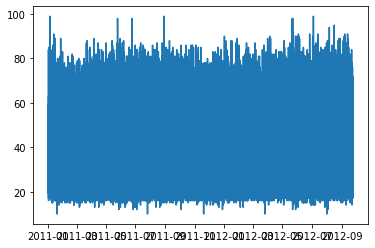

In [20]:
plt.plot(df['subject_age'])

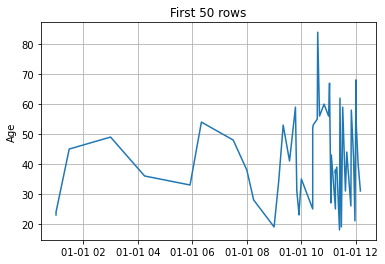

In [21]:
plt.plot(df['subject_age'][0:50])
plt.ylabel('Age')
plt.title('First 50 rows')
plt.grid()
plt.show()

In [22]:
df.shape

(144885, 9)

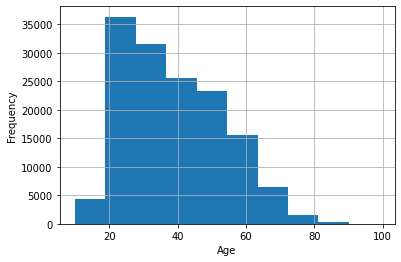

In [23]:
plt.hist(df['subject_age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

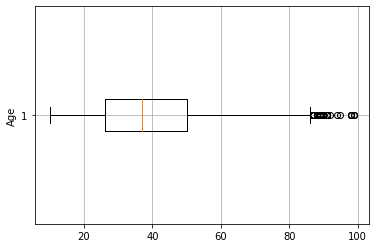

In [24]:
plt.boxplot(df['subject_age'], vert=False)
plt.ylabel('Age')
plt.grid()
plt.show()